In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.7 MB/s eta 0:00:00


In [3]:
import easyocr
import imutils
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
# import os
# os.chdir(R"D:\\AI\\AI Models\\3. OpenCV\\0- OpenCV\\Data\\Automatic-License-Plate-Detection-main\\images")

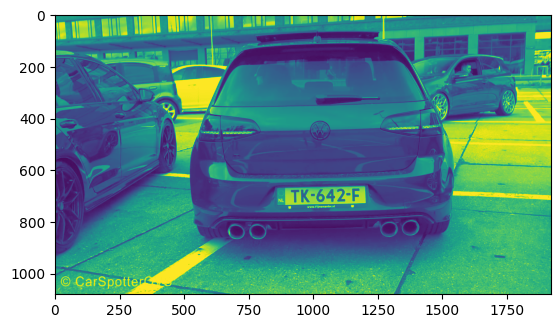

In [34]:
image = cv.imread("N33.jpeg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray)

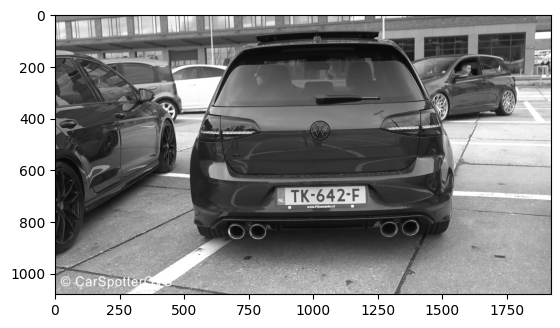

In [35]:
image = cv.imread("N33.jpeg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray,cv.COLOR_BGR2RGB))

* Apply `Bilateral Filter` --> because to apply smoothing on images and apply sharpnes edges

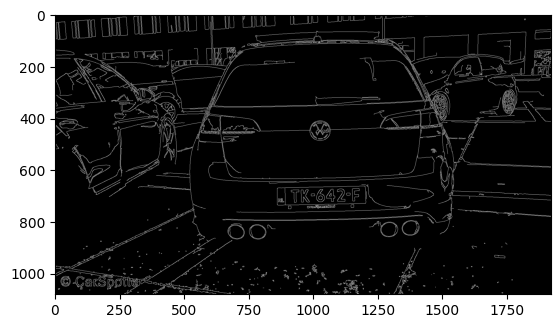

In [36]:
bfilter = cv.bilateralFilter(gray,11,17,17)#Noise Reduction
edged = cv.Canny(bfilter,30,300)#Edge detection
plt.imshow(cv.cvtColor(edged,cv.COLOR_BGR2RGB))

# Apply Contours on edges

In [37]:
keypoints = cv.findContours(edged.copy(),cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss,key = cv.contourArea,reverse=True)[:10]
print("The Length Of Contours Are ==> ", len(contours) , " Contours ")
#print(contours)

The Length Of Contours Are ==>  10  Contours 


In [38]:
location = None
for contour in contours :
  approx = cv.approxPolyDP(contour,10,True)
  if len(approx) == 4 :
    location = approx
    break
print("The Length Of Location --> ",len(location))
print(location)

The Length Of Location -->  4
[[[1198  665]]

 [[ 862  670]]

 [[ 858  735]]

 [[1199  730]]]


In [10]:
approx[1][0][1]

670

In [11]:
approx[2][0][0]

858

In [12]:
approx[2][0][1]

735

* Take `ROI` and put on the mask

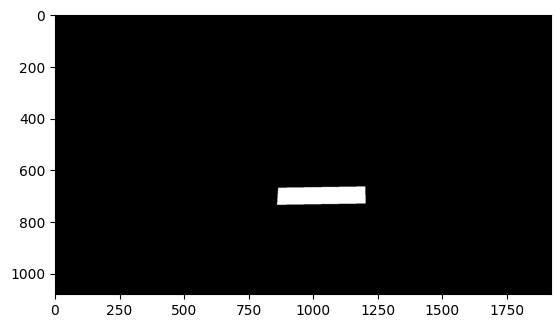

In [39]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv.drawContours(mask,[location],-1,255,-1)
#new_image = cv.bitwise_and(image,image,mask = mask)
plt.imshow(cv.cvtColor(new_image,cv.COLOR_BGR2RGB))

* Used `bitwise_and` because to display the plate numbers of car

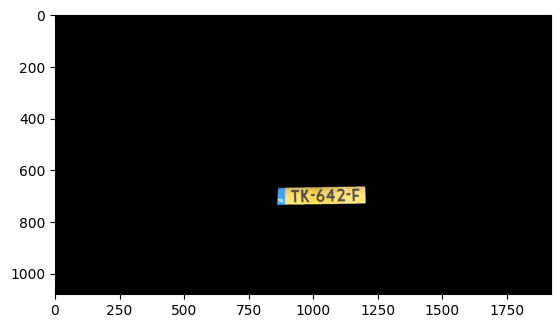

In [40]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv.drawContours(mask,[location],-1,255,-1)
new_image = cv.bitwise_and(image,image,mask = mask)
plt.imshow(cv.cvtColor(new_image,cv.COLOR_BGR2RGB))

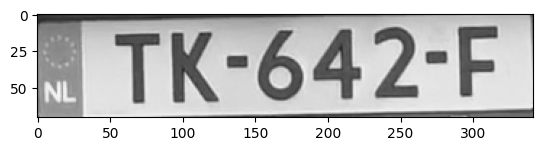

In [41]:
(x,y) = np.where(mask == 255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1,y1:y2+1]
plt.imshow(cv.cvtColor(cropped_image,cv.COLOR_BGR2RGB))

# Apply `EasyOCR Function` because make plate recognition

In [42]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[2, 42], [30, 42], [30, 66], [2, 66]], 'NL', 0.9990891595605481),
 ([[45, 0], [328, 0], [328, 71], [45, 71]], 'TK-642-F', 0.9725195108752892)]

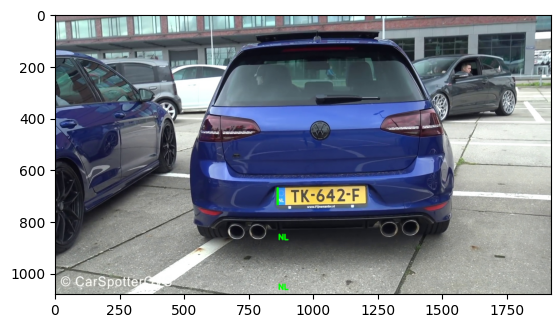

In [50]:
text = result[0][-2]
font = cv.FONT_HERSHEY_SIMPLEX
res = cv.putText(image, text=text, org=(approx[1][0][0], approx[1][0][0]+200), fontFace=font, fontScale=1, color=(0,255,0), thickness=3, lineType=cv.LINE_AA)
res = cv.rectangle(image, tuple(approx[1][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))

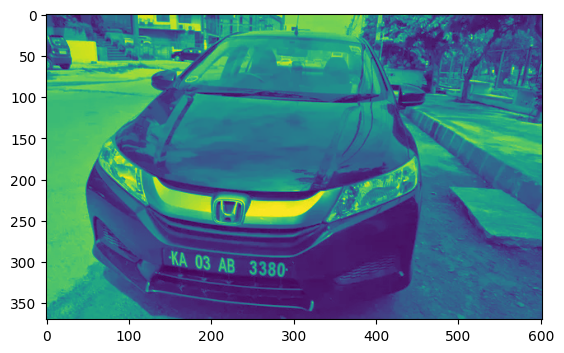

In [26]:
image = cv.imread("N43.jpeg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray)

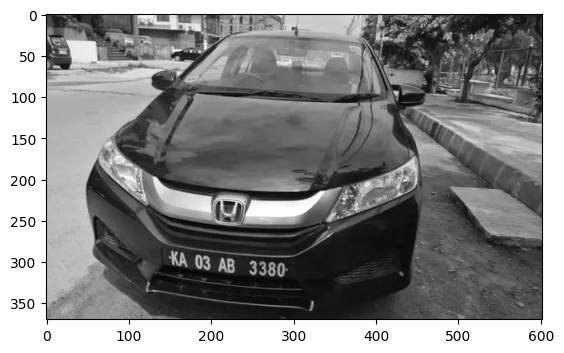

In [27]:
image = cv.imread("N43.jpeg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray,cv.COLOR_BGR2RGB))

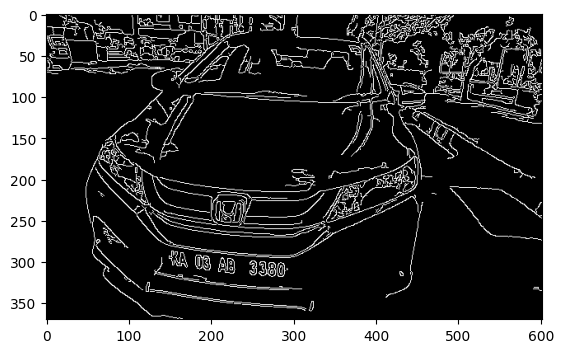

In [28]:
bfilter = cv.bilateralFilter(gray,11,17,17)#Noise Reduction
edged = cv.Canny(bfilter,30,300)#Edge detection
plt.imshow(cv.cvtColor(edged,cv.COLOR_BGR2RGB))

In [29]:
keypoints = cv.findContours(edged.copy(),cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss,key = cv.contourArea,reverse=True)[:10]
print("The Length Of Contours Are ==> ", len(contours) , " Contours ")
#print(contours)

The Length Of Contours Are ==>  10  Contours 


In [51]:
!pip install pytesseract